In [59]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

val_acc = {}

with open("val_acc_1e-1.pkl", "rb") as cp_file:
    val_acc["Learning Rate: 0.1"] = pickle.load(cp_file)["val_acc"]

with open("val_acc_5e-1.pkl", "rb") as cp_file:
    val_acc["Learning Rate: 0.5"] = pickle.load(cp_file)["val_acc"]

with open("val_acc_2e-2.pkl", "rb") as cp_file:
    val_acc["Learning Rate: 0.02"] = pickle.load(cp_file)["val_acc"]


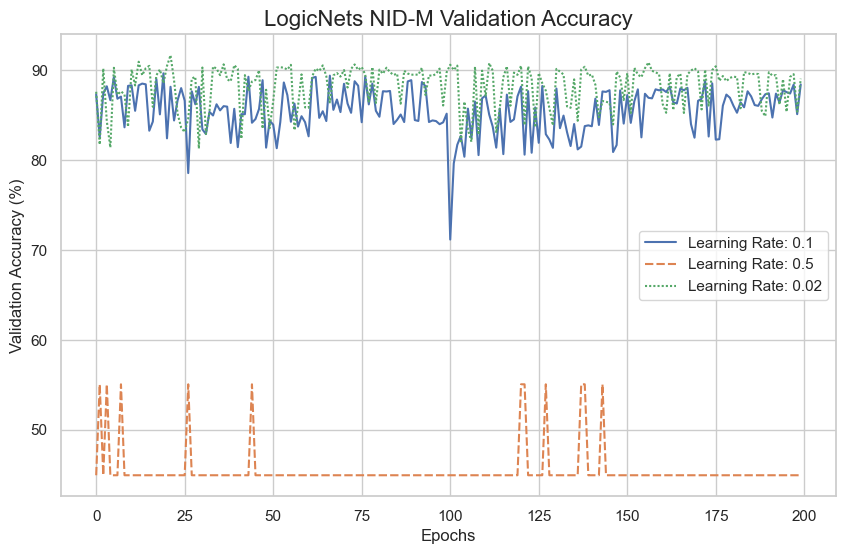

In [61]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

#print(max(val_acc["val_acc_2e-2"]))

sns.lineplot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy (%)")
plt.title("LogicNets NID-M Validation Accuracy", fontsize=16)
plt.legend(loc='center right')

In [33]:
with open("mean_test/1e-1.pkl", "rb") as cp_file:
    data_1e_1 = pickle.load(cp_file)

with open("mean_test/2e-2.pkl", "rb") as cp_file:
    data_2e_2 = pickle.load(cp_file)

df_1e_1 = pd.DataFrame(data_1e_1)
df_2e_2 = pd.DataFrame(data_2e_2)

for df in [df_1e_1, df_2e_2]:
    cma_columns = []
    for column in df.columns.tolist():
        df[f"{column}_CMA"] = df[column].expanding().mean()
        cma_columns.append(f"{column}_CMA")

df_1e_1.head()
df_2e_2.head()

,nid-m,nid-m-comp,nid-s,nid-s-comp,nid-l,nid-l-comp,nid-m_CMA,nid-m-comp_CMA,nid-s_CMA,nid-s-comp_CMA,nid-l_CMA,nid-l-comp_CMA
0,86.939465,89.169460,83.697712,81.847884,91.626585,87.234611,86.939465,89.169460,83.697712,81.847884,91.626585,87.234611
1,87.538260,87.982801,83.072196,83.402565,90.520089,81.867318,87.238862,88.576131,83.384954,82.625225,91.073337,84.550964
2,88.871885,88.588884,84.192052,78.841763,90.707137,90.181218,87.783203,88.580382,83.653986,81.364071,90.951270,86.427715
3,82.615508,88.733421,84.134966,82.579070,88.898606,87.113152,86.491279,88.618642,83.774231,81.667821,90.438104,86.599074
4,88.791721,83.992858,81.641403,81.422776,89.522907,87.379148,86.951368,87.693485,83.347666,81.618812,90.255065,86.755089


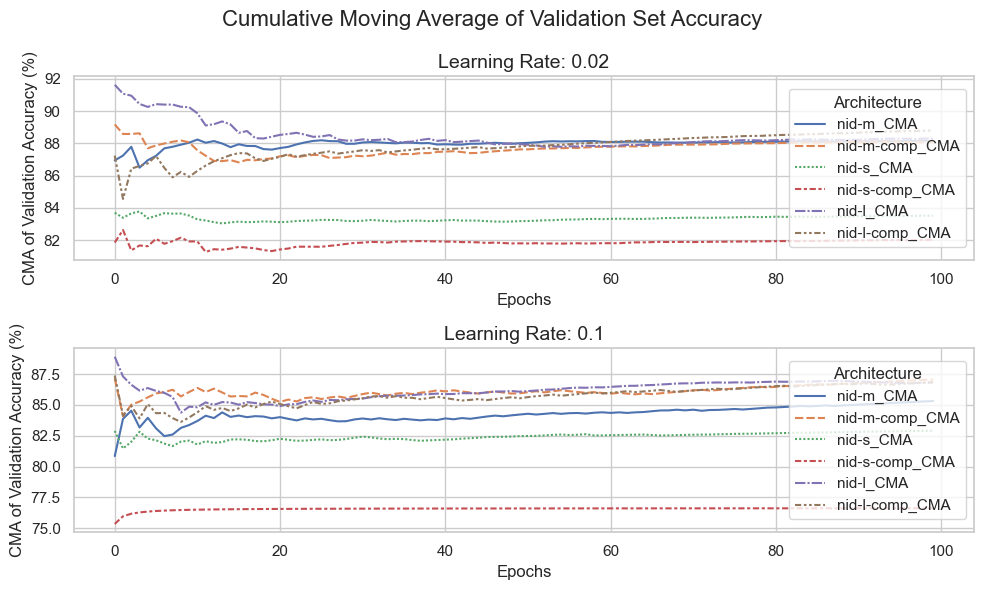

In [47]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
sns.set(style="whitegrid")

fig.suptitle('Cumulative Moving Average of Validation Set Accuracy', fontsize=16)

sns.lineplot(df_2e_2[cma_columns], ax=ax[0])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("CMA of Validation Accuracy (%)")
ax[0].set_title("Learning Rate: 0.02", fontsize=14)
ax[0].legend(loc="center right", title='Architecture')

sns.lineplot(df_1e_1[cma_columns], ax=ax[1])
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("CMA of Validation Accuracy (%)")
ax[1].set_title("Learning Rate: 0.1", fontsize=14)
ax[1].legend(loc="center right", title='Architecture')

plt.tight_layout()